##Read yelp.csv into a DataFrame.

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv")
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


##Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [10]:
data = data[(data.stars == 5) | (data.stars == 1)]

In [11]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


##Split the new DataFrame into training and testing sets, using the review text as the feature and the star rating as the response.

In [27]:
X = data['text']
type(X)

pandas.core.series.Series

In [28]:
y = data['stars']
type(y)

pandas.core.series.Series

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1315)
print [type(obj) for obj in (X_train, X_test, y_train, y_test)]

[<type 'numpy.ndarray'>, <type 'numpy.ndarray'>, <type 'numpy.ndarray'>, <type 'numpy.ndarray'>]


##Use CountVectorizer to create document-term matrices from X_train and X_test.
Hint: If you run into a decoding error, instantiate the vectorizer with the argument decode_error='ignore'.


In [30]:
# instantiate the vectorizer
vect = CountVectorizer()

In [31]:
# learn vocabulary and create document-term matrix in a single step
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<3064x16813 sparse matrix of type '<type 'numpy.int64'>'
	with 237121 stored elements in Compressed Sparse Row format>

In [32]:
# transform testing data into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1022x16813 sparse matrix of type '<type 'numpy.int64'>'
	with 77558 stored elements in Compressed Sparse Row format>

##Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [36]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
# make predictions on test data using test_dtm
y_pred_class = nb.predict(X_test_dtm)
type(y_pred_class)

numpy.ndarray

In [39]:
#Calculate the accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.926614481409


##Calculate the AUC.
Hint 1: Make sure to pass the predicted probabilities to roc_auc_score, not the predicted classes.
Hint 2: roc_auc_score will get confused if y_test contains fives and ones, so you will need to create a new object that contains ones and zeros instead.

In [43]:
# predict (poorly calibrated) probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
type(y_pred_prob)

numpy.ndarray

In [91]:
#transform y to have (1, 0) classes
#Let's try out LabelBinarizer
lb = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
lb.fit(y_test)
y_class = lb.transform(y_test)
y_class
#Bit annoying, the dimensions should be great for scikit-learn, but hard to think about in numpy. 
#The flatten method will be useful

array([[1],
       [0],
       [1],
       ..., 
       [1],
       [1],
       [1]])

In [98]:
#In fact let's just make the dimensions consistent right now
y_class = y_class.flatten()
y_class

array([1, 0, 1, ..., 1, 1, 1])

In [99]:
#Check to see that 5 is mapped to positive class
y_test

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

In [100]:
#calculate AUC
print metrics.roc_auc_score(y_class, y_pred_prob)

0.940507970648


##Plot the ROC curve.

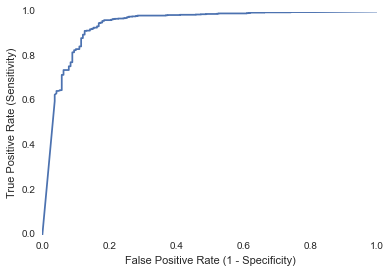

In [101]:
fpr, tpr, thresholds = metrics.roc_curve(y_class, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

##Print the confusion matrix, and calculate the sensitivity and specificity.

In [102]:
confusion_array = metrics.confusion_matrix(y_test, y_pred_class)
print confusion_array

[[130  60]
 [ 15 817]]


In [103]:
#Calcuate sensitivity
nb_true_positives = confusion_array[1][1]
nb_false_negatives = confusion_array[1][0]
nb_positives = nb_true_positives + nb_false_negatives
nb_sensivity = float(nb_true_positives)/nb_positives
print nb_sensivity

0.981971153846


In [104]:
#Calcuate specificity
nb_true_negatives = confusion_array[0][0]
nb_false_negatives = confusion_array[0][1]
nb_negatives = nb_true_negatives + nb_false_negatives
nb_specificity = float(nb_true_negatives)/nb_negatives
print nb_specificity

0.684210526316


##Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [111]:
# False positives
# Note: both y_test and y_pred_class contain (1, 5), 
# this is inconsistent with y_class--a convention should have been established earlier
X_test[y_test < y_pred_class]

array([ "It was my Birthday and my wife, her mom, a dear friend and I headed to Fleming's Steakhouse in Chandler, AZ. We heard only great things about this place and wanted to experience their 'unforgettable' steak dishes. That, we did, unfortunately. \r\n\r\nThe restaurant was lovely dim-lit, adequate atmosphere for an expensive steak place. We were seated immediately and tended to by the waiting staff. The small roll of bread and two kinds of butter were good but insufficient for four hungry souls and we polished it up right away. No one offered to bring more. Our waiter told us about the daily specials, after which we ordered food and wine. After a short wait, four large dinner plates arrived. I was the lucky one, my steak (a large  rib eye steak, ordered medium-rare which tasted very good despite two large blobs of fat) was sitting pretty in the middle of the large dinner plate. Nothing else on my plate, just the steak. I looked around at my wife's plate and couldn't believe, her f

In [113]:
#False negatives
X_test[y_test > y_pred_class]

array([ "This place really made a terrible situation as easy as possible.  Our cat was hit by a car or beaten, and my husband found her immobile and crying horribly in pain.  We rushed her to the clinic, and the doctor saw her right away.  She told us our options, but was very upfront about the liklihood that our kitty would pass no matter what we did.  She didn't pressure us one way or another, and left the room so that we could talk privately and make our decision.  My husband asked if they could give her some pain meds while we talked about it, and they gave her some immediately.\r\n\r\nOnce we made our difficult decision to put our kitty down, she brought the cat into a private room with us so that we could say goodbye.  She left us alone and gave us as much time as we needed.  She also let us be present in the room when they gave her the final shot.  At all times the doctor and the techs were compassionate and very respectful.  I was crying and they were very sensitive to my feeli

These cases are more complex than what we looked over in class, but it seems that Naive Bayes is picking up the correct keywords while missing semantic information and word context. "Not good" should have a positive connotation, but the algorithm probably sees it as negative. Similarly, "This place really made a terrible situation as easy as possible..." seems like it will throw off the algorithm due to the semantic context of speaking about a terrible situation, not a terrible place.

##Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?
Bonus: Turn this into a 5-class classification problem by predicting the star rating using the original DataFrame (from step 1). Calculate the accuracy and print the confusion matrix. Comment on the results.

In [156]:
#There's probably a less brutish way of doing this, but this is more fun
def calculate_sensitivity(confusion_array):
    """Takes confusion matrix from scikit-learn and compute sensitivity"""
    true_positives = confusion_array[1][1]
    false_negatives = confusion_array[1][0]
    positives = true_positives + false_negatives
    return float(true_positives)/positives

def calcuate_specificity(confusion_array):
    """Takes confusion matrix from scikit-learn and compute specificity"""
    true_negatives = confusion_array[0][0]
    false_negatives = confusion_array[0][1]
    negatives = true_negatives + false_negatives
    return float(true_negatives)/negatives
    

def least_square_sensivity_specificity(proba):
    """minimize the squared difference of sensitivity and specificity"""
    confusion_array = metrics.confusion_matrix(y_class, y_pred_prob > proba)
    
    sensivity = calculate_sensitivity(confusion_array)
    specificity = calcuate_specificity(confusion_array)
    
    return (sensivity - specificity)**2

def grid_search(objective_function, threshold=0.0001):
    """optimize with one dimensional grid search/binary search"""
    #Explicit data to stay off the function stack
    lower, upper = 0, 1
    acc = 10
    
    #Main loop: Test upper and lower sector, pick the better, repeat
    while acc > threshold:
        mid = np.mean([lower, upper])
        eval_upper = objective_function(np.mean([mid, upper]))
        eval_lower = objective_function(np.mean([lower, mid]))
    
        if eval_upper <= eval_lower:
            lower = mid
            acc = eval_upper
        else:
            upper = mid
            acc = eval_lower
    return (mid, acc)

mid, acc = grid_search(least_square_sensivity_specificity, threshold=0.0001)
print 'Best Guess: %f' % mid, 'Accuracy: %f' %acc

Best Guess: 0.998047 Accuracy: 0.000032


In [148]:
#confirm answer
proba = .998046875
print 'Decision Boundry: %f' % proba
confusion_array = metrics.confusion_matrix(y_class, y_pred_prob > proba)
    
#Calcuate sensitivity
true_positives = confusion_array[1][1]
false_negatives = confusion_array[1][0]
positives = true_positives + false_negatives
sensivity = float(true_positives)/positives
print 'Sensitivity: %s' % sensivity

#Calcuate specificity
true_negatives = confusion_array[0][0]
false_negatives = confusion_array[0][1]
negatives = true_negatives + false_negatives
specificity = float(true_negatives)/negatives
print 'Specificity: %s' %  specificity

Decision Boundry: 0.998047
Sensitivity: 0.896634615385
Specificity: 0.878947368421


Approximately...